#ML Project: SF Bay Area House Prices

In [2]:
!pip install plotly.express --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error, r2_score
import sklearn as sklearn
import folium
from sklearn.ensemble import VotingRegressor
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [5]:
data='https://raw.githubusercontent.com/csbfx/cs133/main/sf_bayarea_house_prices.csv'
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       7137 non-null   object 
 1   City          7145 non-null   object 
 2   State         7145 non-null   object 
 3   Zip           7145 non-null   int64  
 4   Price         7145 non-null   int64  
 5   Beds          7145 non-null   int64  
 6   Baths         7145 non-null   float64
 7   Home size     7063 non-null   float64
 8   Lot size      6880 non-null   float64
 9   Latitude      7145 non-null   float64
 10  Longitude     7145 non-null   float64
 11  SF time       7145 non-null   int64  
 12  PA time       7145 non-null   int64  
 13  School score  7085 non-null   float64
 14  Commute time  7145 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 837.4+ KB


# **DATA EXPLORATION**

In [6]:
df.head()

,Address,City,State,Zip,Price,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time
0,2412 Palmer Ave,Belmont,CA,94002,1459000,3,2.0,1360.0,5001.0,37.516781,-122.304623,63,33,77.9,33
1,1909 Hillman Ave,Belmont,CA,94002,1595000,4,2.0,2220.0,3999.0,37.521972,-122.294079,63,33,77.9,33
2,641 Waltermire St,Belmont,CA,94002,899999,2,1.0,840.0,4234.0,37.520233,-122.273144,63,33,77.9,33
3,2706 Sequoia Way,Belmont,CA,94002,1588000,3,2.0,1860.0,5210.0,37.520192,-122.309437,63,33,77.9,33
4,1568 Winding Way,Belmont,CA,94002,1999000,4,3.5,2900.0,16117.2,37.524280,-122.291241,63,33,77.9,33


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       7137 non-null   object 
 1   City          7145 non-null   object 
 2   State         7145 non-null   object 
 3   Zip           7145 non-null   int64  
 4   Price         7145 non-null   int64  
 5   Beds          7145 non-null   int64  
 6   Baths         7145 non-null   float64
 7   Home size     7063 non-null   float64
 8   Lot size      6880 non-null   float64
 9   Latitude      7145 non-null   float64
 10  Longitude     7145 non-null   float64
 11  SF time       7145 non-null   int64  
 12  PA time       7145 non-null   int64  
 13  School score  7085 non-null   float64
 14  Commute time  7145 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 837.4+ KB


In [8]:
df.describe()

,Zip,Price,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time
count,7145.000000,7.145000e+03,7145.000000,7145.000000,7063.000000,6.880000e+03,7145.000000,7145.000000,7145.000000,7145.000000,7085.000000,7145.000000
mean,94610.732120,1.676225e+06,3.594822,2.572498,2244.186040,2.807283e+04,37.692989,-122.124319,83.335899,83.850385,52.669273,67.370749
std,343.763512,2.407593e+06,1.030743,1.127692,1369.340525,3.215086e+05,0.262637,0.238086,27.048451,34.195327,20.007771,29.160700
min,94002.000000,1.290000e+05,1.000000,1.000000,107.000000,4.360000e+02,37.150065,-122.698597,8.000000,5.000000,17.100000,5.000000
25%,94509.000000,7.299500e+05,3.000000,2.000000,1408.000000,4.850750e+03,37.450607,-122.281695,65.000000,60.000000,33.800000,47.000000
50%,94572.000000,1.099988e+06,4.000000,2.500000,1904.000000,6.477000e+03,37.741127,-122.117378,90.000000,85.000000,50.900000,63.000000
75%,94920.000000,1.699000e+06,4.000000,3.000000,2646.500000,1.001880e+04,37.915970,-121.951238,100.000000,110.000000,71.000000,90.000000
max,95391.000000,4.999000e+07,13.000000,11.000000,20982.000000,1.364561e+07,38.149218,-121.503746,170.000000,150.000000,89.800000,135.000000


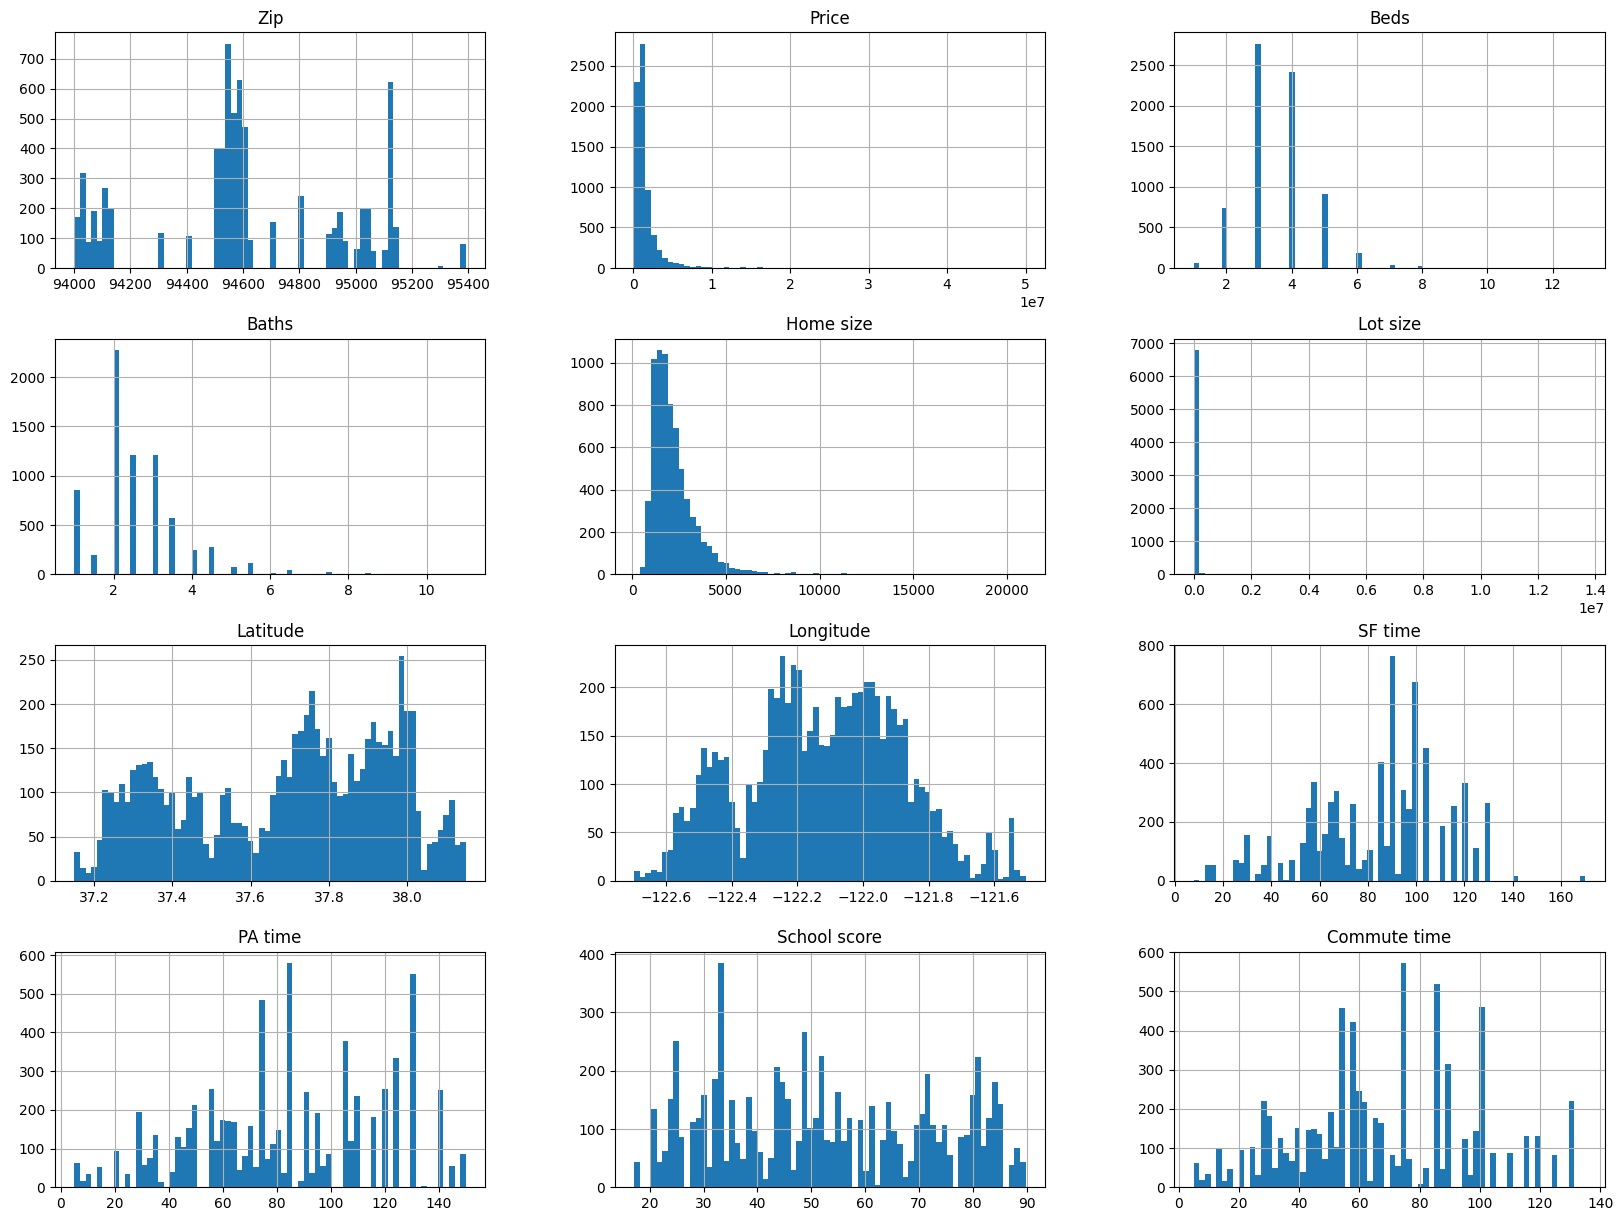

In [9]:
df.hist(bins=70, figsize=(20,15))
plt.show()

**What does the distribution of home prices look like?**

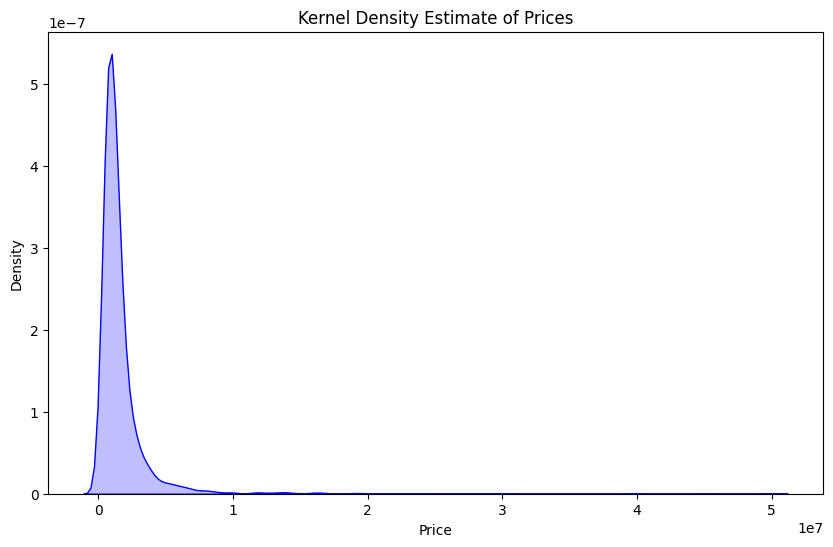

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price'], color='blue', fill=True)
plt.title('Kernel Density Estimate of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

The distribution is heavily skewed right with most houses being around the same price range and then a handful of extreme outliers.

Lets take a look at this with logarithmic scaling so we can better visualize the distribution

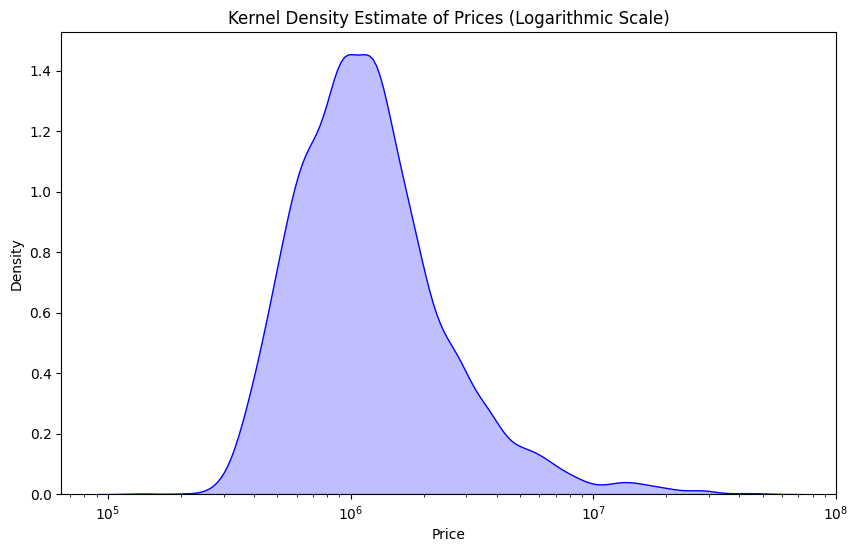

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price'], log_scale=True, color='blue', fill=True)
plt.title('Kernel Density Estimate of Prices (Logarithmic Scale)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

**Where are the houses valued above 10,000,000 generally located? Are there any patterns regarding city or distance from major cities?**

In [12]:
high_value_properties = df[df['Price'] >= 10000000]
latitude, longitude = high_value_properties['Latitude'].mean(), high_value_properties['Longitude'].mean()

map_high_value_properties = folium.Map(location=[latitude, longitude], zoom_start=10)

for index, row in high_value_properties.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Price: ${row['Price']}, Beds: {row['Beds']}, Baths: {row['Baths']}",
                  icon=folium.Icon(color='red')).add_to(map_high_value_properties)
map_high_value_properties

In [13]:
high_value_cities = df[df['Price'] > 10000000].groupby('City').size().reset_index(name='Number_of_High_Value_Houses')

high_value_cities = high_value_cities.sort_values(by='Number_of_High_Value_Houses', ascending=False)
high_value_cities

,City,Number_of_High_Value_Houses
0,Atherton,26
5,Palo Alto,16
9,San Francisco,14
3,Los Altos Hills,10
12,Woodside,8
1,Belvedere,6
2,Hillsborough,2
4,Los Gatos,2
6,Pescadero,2
7,Portola Valley,2


The houses valued above 10 million tend to be in the outskirts of cities or near landmarks.
They also tend to cluster near the same area, such as San Francisco and Palo Alto.
One last thing to note is that three of the high value cities cluster around Stanford University.


**Is there a correlation between general commute time and home prices?**

In [14]:
configure_plotly_browser_state()
px.scatter(df, x="Commute time", y="Price", color="Commute time", title="Correlation Between Commute Times and Home Prices")


There is a moderate correlation between the general commute time and price of a home. As the general commute time increases, the max prices of homes decreases.

**What is the relationship between the physical atrributes of a house and it's price?**

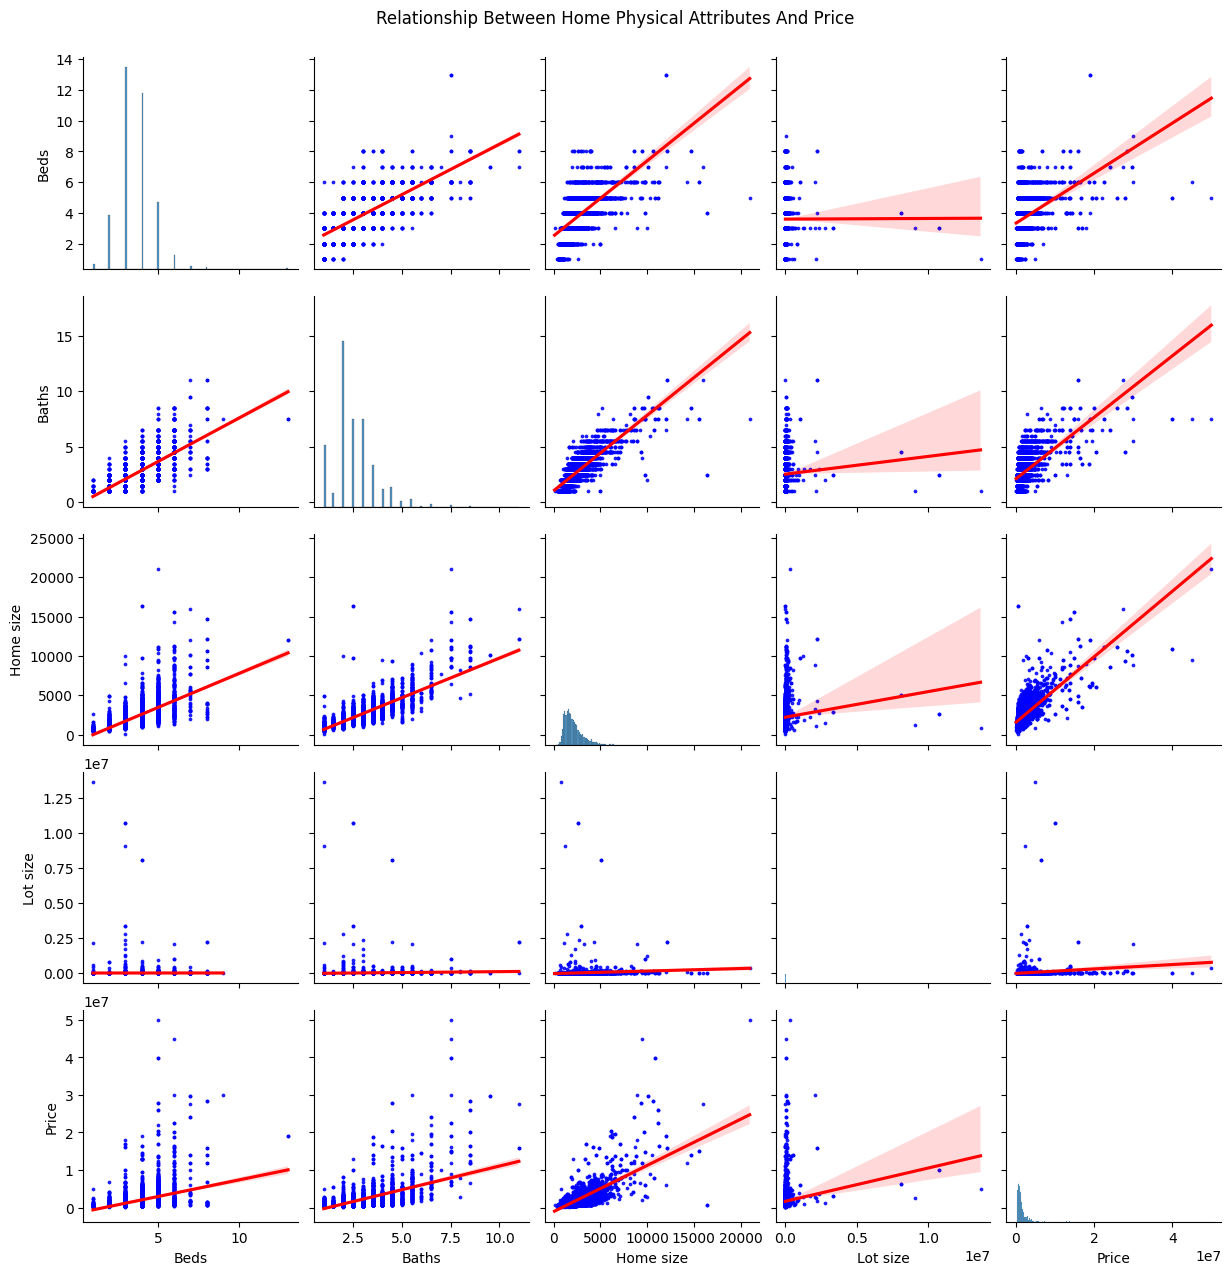

In [15]:
variables = ['Beds', 'Baths', 'Home size', 'Lot size', 'Price']

subset_df = df[variables]

g = sns.pairplot(subset_df, kind='reg', plot_kws={'scatter_kws': {'s': 3, 'color': 'blue'}, 'line_kws': {'color': 'red'}})
g.fig.suptitle("Relationship Between Home Physical Attributes And Price", y = 1.02)
plt.show()

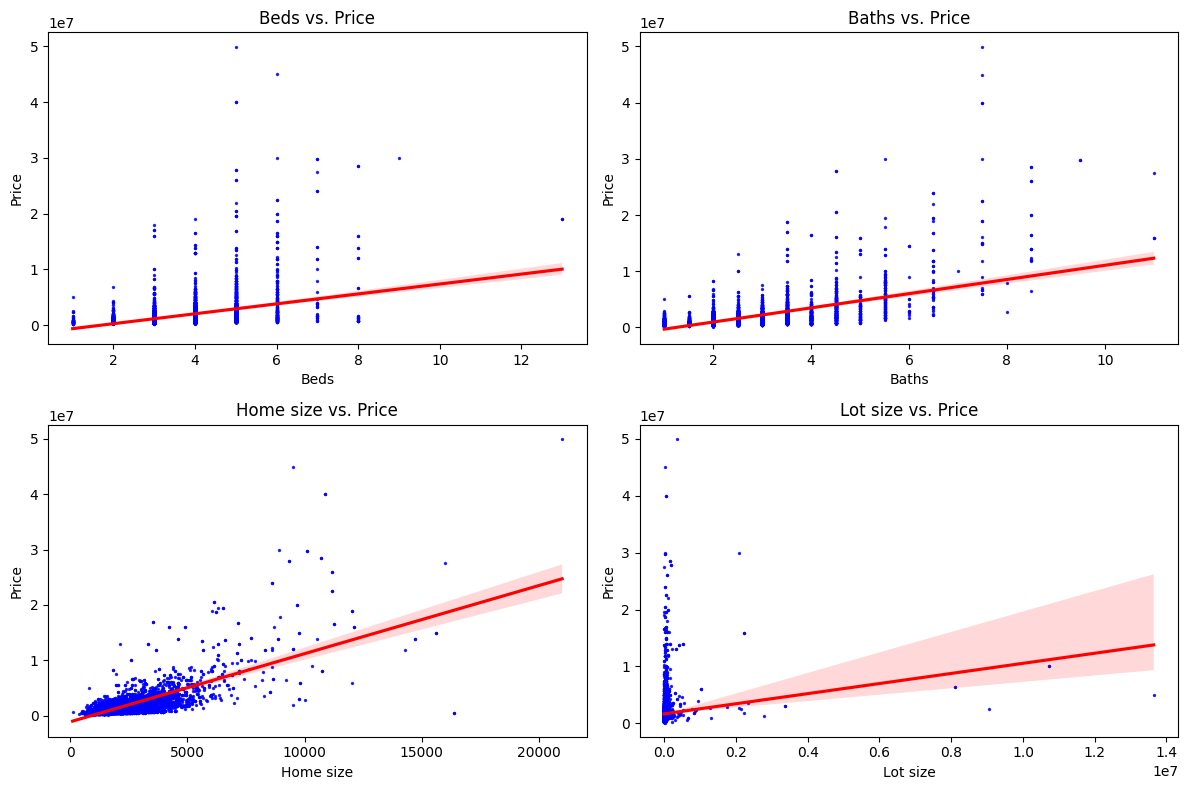

In [16]:
variables = ['Beds', 'Baths', 'Home size', 'Lot size']

subset_df = df[variables + ['Price']]

plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=variable, y='Price', data=subset_df, scatter_kws={'s': 2, 'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'{variable} vs. Price')

plt.tight_layout()
plt.show()

There is a moderate correlation with all attributes except for lot size with a majority of houses having a similar lot size.

**How do the average property prices vary across different school score ranges?**

<ipython-input-17-afa66e70128d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




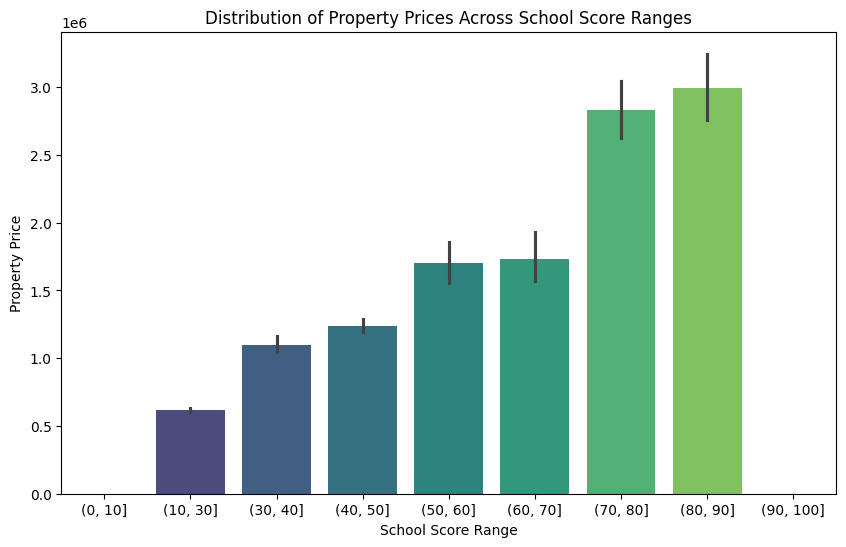

In [17]:
df['School Score Range'] = pd.cut(df['School score'], bins=[0, 10, 30, 40, 50, 60, 70, 80, 90, 100])

plt.figure(figsize=(10, 6))
sns.barplot(x='School Score Range', y='Price', data=df, palette='viridis')
plt.title('Distribution of Property Prices Across School Score Ranges')
plt.xlabel('School Score Range')
plt.ylabel('Property Price')
plt.show()

There is a very clear proportional correlation between the value of homes and school ratings.

In [18]:
df = df.drop(['School Score Range'], axis = 1)

In [19]:
df.isna().sum()

Address           8
City              0
State             0
Zip               0
Price             0
Beds              0
Baths             0
Home size        82
Lot size        265
Latitude          0
Longitude         0
SF time           0
PA time           0
School score     60
Commute time      0
dtype: int64

There is a very clear proportional correlation between the value of homes and school ratings.


# **PreProccesing and data splitting**

Before considering imputing data let us see the significance of these variables that have null values in them

In [20]:
df = df.drop(['State'], axis=1)
df

,Address,City,Zip,Price,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time
0,2412 Palmer Ave,Belmont,94002,1459000,3,2.0,1360.0,5001.0,37.516781,-122.304623,63,33,77.9,33
1,1909 Hillman Ave,Belmont,94002,1595000,4,2.0,2220.0,3999.0,37.521972,-122.294079,63,33,77.9,33
2,641 Waltermire St,Belmont,94002,899999,2,1.0,840.0,4234.0,37.520233,-122.273144,63,33,77.9,33
3,2706 Sequoia Way,Belmont,94002,1588000,3,2.0,1860.0,5210.0,37.520192,-122.309437,63,33,77.9,33
4,1568 Winding Way,Belmont,94002,1999000,4,3.5,2900.0,16117.2,37.524280,-122.291241,63,33,77.9,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,The Davis,Mountain House,95391,603990,5,3.0,2327.0,NaN,37.756444,-121.547719,120,125,65.3,120
7141,The Berkeley,Mountain House,95391,619990,5,4.0,2410.0,NaN,37.756444,-121.547719,120,125,65.3,120
7142,Geranium,Mountain House,95391,666340,5,4.0,2486.0,NaN,37.764721,-121.537761,120,125,65.3,120
7143,The Pepperdine,Mountain House,95391,659990,5,4.0,2856.0,NaN,37.756444,-121.547719,120,125,65.3,120


In [21]:
x = df.drop(['Price'], axis = 1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
df_new = pd.concat([x_train, y_train], axis = 1)
df_new

,Address,City,Zip,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time,Price
577,1025 Harrison Ave,Redwood City,94062,3,3.0,2300.0,3123.0,37.476860,-122.239420,68,43,59.5,43,1698000
59,790 Bowhill Rd,Hillsborough,94010,4,3.0,3426.0,21780.0,37.553233,-122.341034,55,50,80.1,50,3695000
3717,4095 Canyon Crest Rd W,San Ramon,94582,4,3.0,2758.0,6240.0,37.788699,-121.948249,100,105,84.5,100,1168000
787,1178 Myrtle Dr,Sunnyvale,94086,3,2.0,1580.0,5445.0,37.360803,-121.997410,88,32,54.5,32,1299000
2540,26615 Call Ave,Hayward,94542,5,3.0,3341.0,8833.0,37.657468,-122.046102,95,75,38.7,75,1099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6088 Alpine Blue Dr,San Ramon,94582,4,3.5,2810.0,3629.0,37.759593,-121.910201,100,105,84.5,100,1449000
5191,1331 Hayes St,Richmond,94806,2,1.0,1072.0,3360.0,37.953395,-122.346653,90,120,30.0,90,425000
5226,71 Twin Oaks Ave,San Rafael,94901,4,3.5,3316.0,43560.0,37.981921,-122.534293,57,105,38.7,57,1850000
5390,4795 Paradise Dr,Tiburon,94920,5,5.5,4888.0,17859.6,37.915970,-122.480580,58,105,80.0,58,4295000


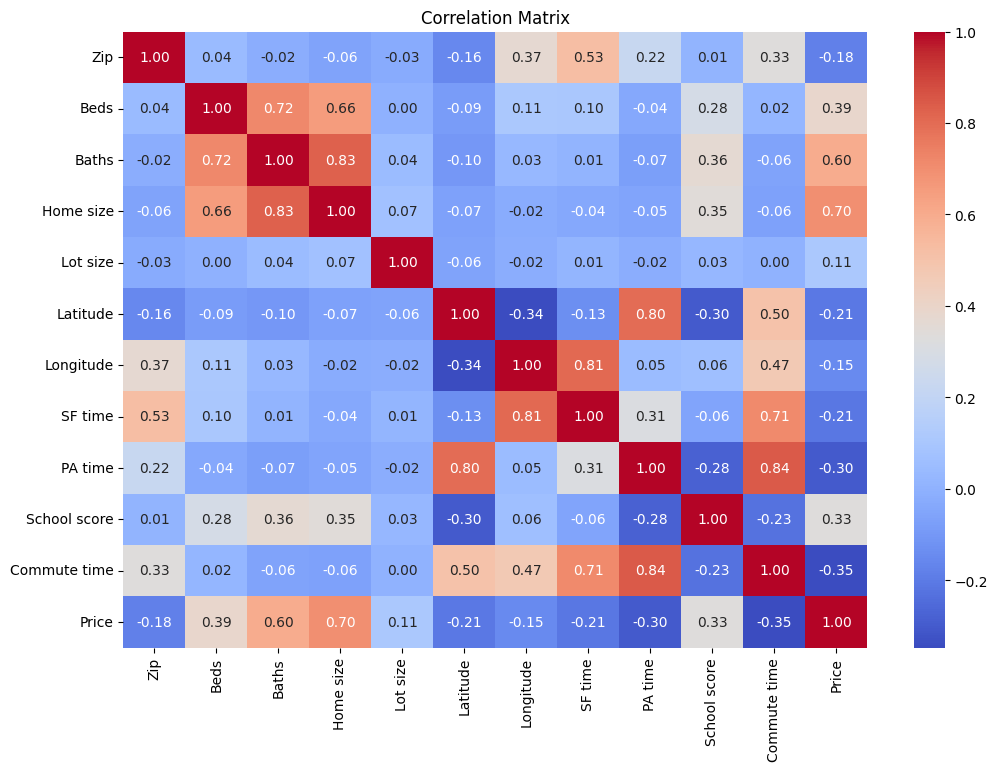

In [22]:
correlation_matrix = df_new.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Lets impute our missing values with the mean

In [23]:
#df_new = df
columns_to_impute = ['Home size', 'School score', 'Lot size']
df_new[columns_to_impute] = df_new[columns_to_impute].fillna(df[columns_to_impute].mean())
df_new.isna().sum()

Address         7
City            0
Zip             0
Beds            0
Baths           0
Home size       0
Lot size        0
Latitude        0
Longitude       0
SF time         0
PA time         0
School score    0
Commute time    0
Price           0
dtype: int64

There are also some Addresses that are not there. We can just drop the column entirely because every house would have a different address making it useless for price predictions

In [24]:
df['Address'].value_counts().sum()


7137

Since every single house has a different address, the variable is useless to us

In [25]:
df_new.drop(['Address'], axis = 1)

,City,Zip,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time,Price
577,Redwood City,94062,3,3.0,2300.0,3123.0,37.476860,-122.239420,68,43,59.5,43,1698000
59,Hillsborough,94010,4,3.0,3426.0,21780.0,37.553233,-122.341034,55,50,80.1,50,3695000
3717,San Ramon,94582,4,3.0,2758.0,6240.0,37.788699,-121.948249,100,105,84.5,100,1168000
787,Sunnyvale,94086,3,2.0,1580.0,5445.0,37.360803,-121.997410,88,32,54.5,32,1299000
2540,Hayward,94542,5,3.0,3341.0,8833.0,37.657468,-122.046102,95,75,38.7,75,1099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,San Ramon,94582,4,3.5,2810.0,3629.0,37.759593,-121.910201,100,105,84.5,100,1449000
5191,Richmond,94806,2,1.0,1072.0,3360.0,37.953395,-122.346653,90,120,30.0,90,425000
5226,San Rafael,94901,4,3.5,3316.0,43560.0,37.981921,-122.534293,57,105,38.7,57,1850000
5390,Tiburon,94920,5,5.5,4888.0,17859.6,37.915970,-122.480580,58,105,80.0,58,4295000


City is our only Categorical Variable

In [26]:
df_new['City'].nunique()

117

Lets encode the City variable with average price of houses in that city

In [27]:
df_new['CityEncoded'] = df_new.groupby('City')['Price'].transform("mean") #Target encoding


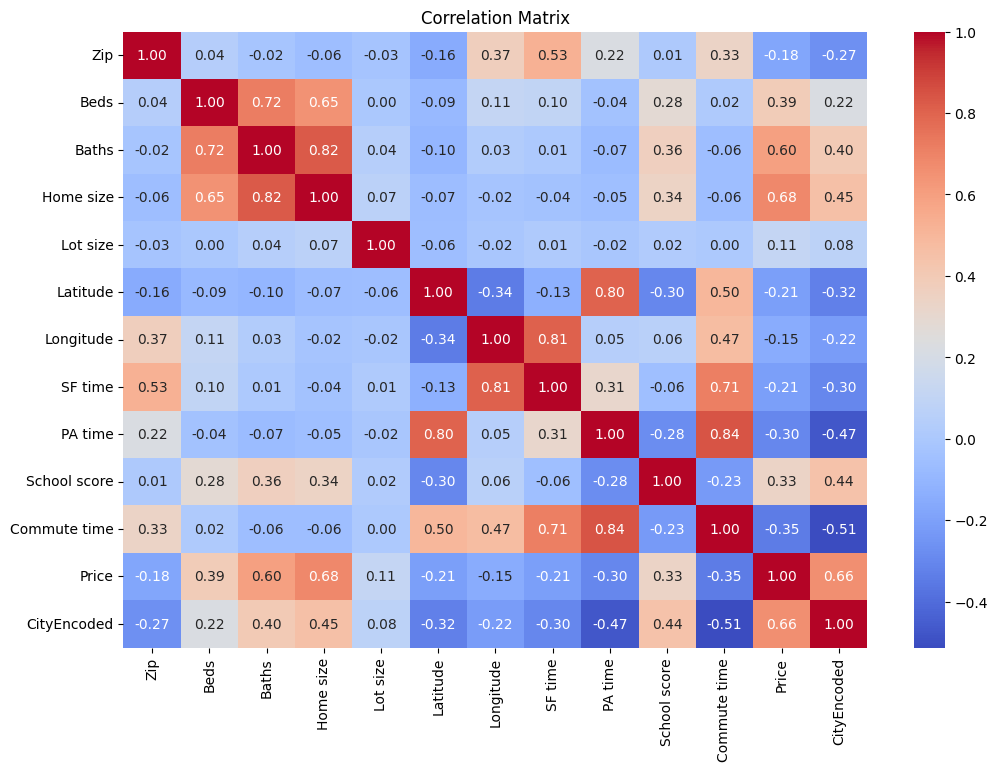

In [29]:
correlation_matrix = df_new.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The encoded City variable seems to have a moderate positive correlation with price

In [30]:
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)
print(correlation_with_price)

Price           1.000000
Home size       0.681561
CityEncoded     0.660743
Baths           0.595284
Beds            0.386697
School score    0.333607
Lot size        0.109120
Longitude      -0.147110
Zip            -0.178650
Latitude       -0.209774
SF time        -0.210126
PA time        -0.304449
Commute time   -0.346825
Name: Price, dtype: float64


We wont include zip because even though a low correlation does not mean anything as zip is not really a continous variable, it is associated with city and having both zip and city could cause overfitting

In [31]:
features = ['Beds', 'Baths', 'Home size', 'PA time', 'School score', 'Commute time', 'CityEncoded']

In [32]:
def custom_preprocessing(xtrain, ytrain):
    imputer = SimpleImputer(strategy='mean')
    columns_to_impute = ['Home size', 'School score', 'Lot size']
    xtrain[columns_to_impute] = imputer.fit_transform(xtrain[columns_to_impute])
    temp = pd.concat([xtrain, ytrain], axis=1)
    temp['CityEncoded'] = temp.groupby('City')['Price'].transform("mean")
    temp = temp.drop(['City'], axis=1)
    xtrain_processed = temp[features]
    ytrain_processed = temp['Price']
    return xtrain_processed, ytrain_processed

In [33]:
x_train, y_train = custom_preprocessing(x_train, y_train)

# **Training and tuning**

In [34]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

model_compare = pd.DataFrame()

for model_name, model in models.items():
    pipeline_mape = make_pipeline(StandardScaler(), model)
    cv_scores_mape = cross_val_score(pipeline_mape, x_train, y_train, cv=10, scoring=mape_scorer)
    mape_scores = [-score for score in cv_scores_mape]
    pipeline_r2 = make_pipeline(StandardScaler(), model)
    cv_scores_r2 = cross_val_score(pipeline_r2, x_train, y_train, cv=10, scoring=r2_scorer)
    model_row = pd.DataFrame([{'Model': model_name,
                               'MAPE': (sum(mape_scores)/len(mape_scores))*100,
                               'R_squared': cv_scores_r2.mean()
                               }])
    model_compare = pd.concat([model_compare, model_row], ignore_index=True)





In [35]:
model_compare

,Model,MAPE,R_squared
0,Linear Regression,47.918546,0.631949
1,Decision Tree,15.150407,0.722552
2,Random Forest,13.740783,0.808534
3,Gradient Boosting,17.960512,0.756960
4,XGBoost,14.008214,0.772472


Linear Regression is performing quite poorly
Out of the 4 that are performing well, Random Forest and XGBoost are performing the best

In [36]:
x_test, y_test = custom_preprocessing(x_test,y_test)

In [37]:
xg = XGBRegressor()
xg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [38]:
rf_regressor = RandomForestRegressor()
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8],'min_samples_leaf' : [1, 3, 5]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'min_samples_leaf' : [1, 3]}
  ]
grid_search = GridSearchCV(rf_regressor, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [40]:
print(best_params)

{'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 10}


In [41]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_regressor', RandomForestRegressor(bootstrap=False,max_features=4,min_samples_leaf=1,n_estimators=10))
])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R^2: {r2:.2f}%')

Mean Absolute Percentage Error: 12.65%
R^2: 0.77%


In [42]:

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=10, scoring=mape_scorer)
print(f"Mean MAPE: {abs(cv_scores.mean()) * 100:.2f}%")

Mean MAPE: 12.73%


In [43]:
param_grid = {
    'learning_rate': [0.05, 0.10, 0.15],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.4]
}
grid_search = GridSearchCV(xg, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [44]:
best_params

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 4,
 'min_child_weight': 1}

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 4,
 'min_child_weight': 1}

In [45]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('XG_regressor', XGBRegressor(**best_params))
])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R^2: {r2:.2f}')



Mean Absolute Percentage Error: 16.98%
R^2: 0.74


A slight improvement, lets try now to create an ensemble model using the 4 base models that worked the best

In [46]:
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()

models = [('DecisionTree', dt_model), ('RandomForest', rf_model), ('GradientBoosting', gb_model), ('XGBoost', xgb_model)]

ensemble_pipeline = make_pipeline(
    StandardScaler(),
    VotingRegressor(estimators=models)
)

ensemble_pipeline.fit(x_train, y_train)

y_pred = ensemble_pipeline.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rsquared = r2_score(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R^2 score: {rsquared:.2f}')

Mean Absolute Percentage Error: 12.96%
R^2 score: 0.77


In [47]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
cv_scores = -cross_val_score(ensemble_pipeline, x_train, y_train, cv=10, scoring=mape_scorer)
print(f"Mean MAPE: {np.mean(cv_scores) * 100:.2f}%")

Mean MAPE: 13.66%


It seems the Tuned Random Forest Regressor performs the best

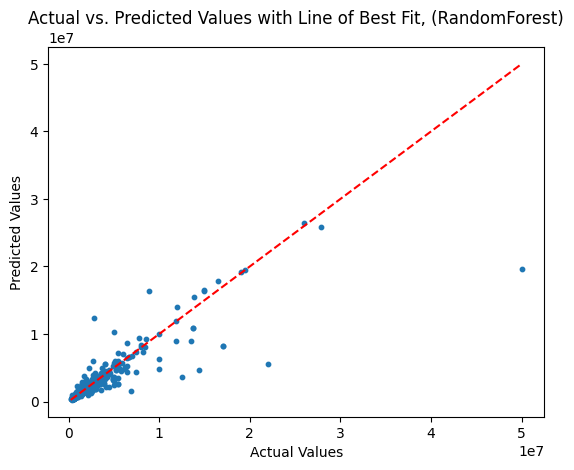

In [48]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_regressor', RandomForestRegressor(bootstrap=False,max_features=4,min_samples_leaf=1,n_estimators=10))
])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
plt.scatter(y_test, y_pred, s = 10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Line of Best Fit, (RandomForest)')
plt.show()

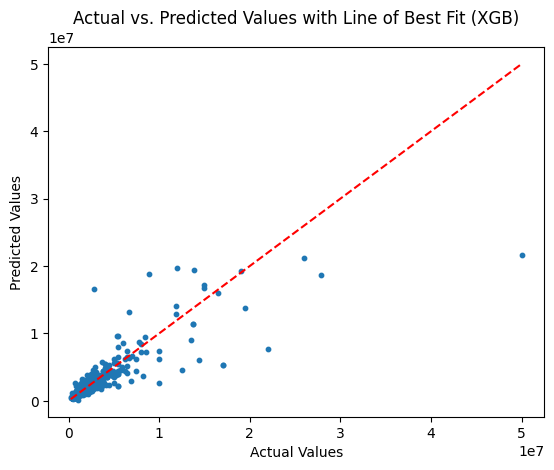

In [49]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_regressor', XGBRegressor(**best_params))
])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
plt.scatter(y_test, y_pred, s = 10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Line of Best Fit (XGB)')
plt.show()

<ipython-input-50-cc862dfd3d20>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-50-cc862dfd3d20>:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




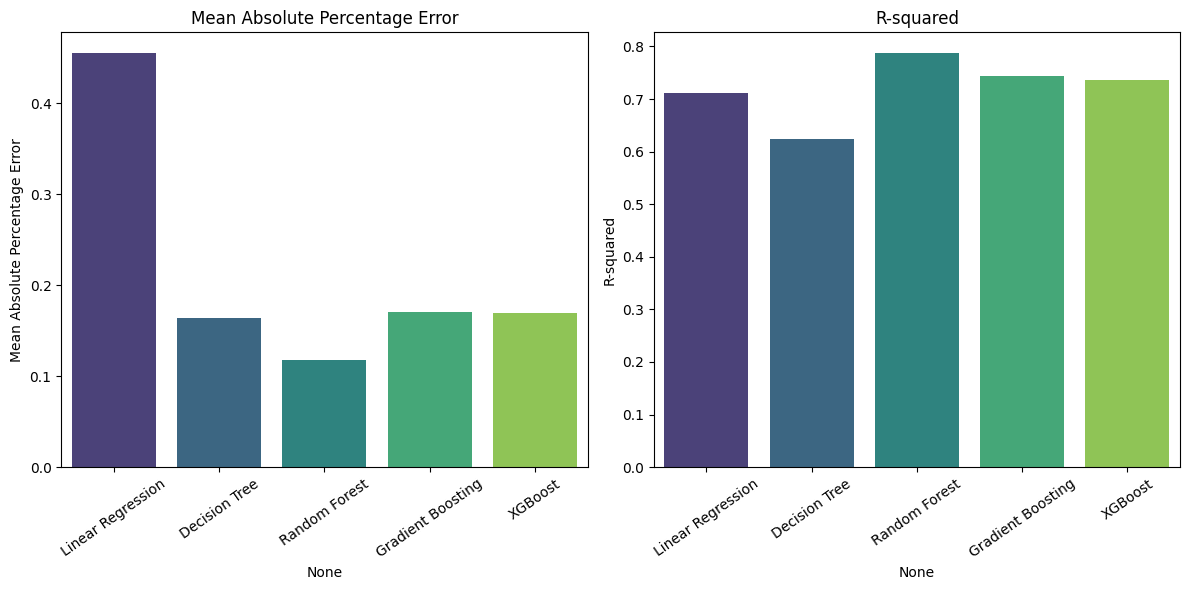

In [50]:
scaler = StandardScaler()
models = {
    'Linear Regression': make_pipeline(scaler, LinearRegression()),
    'Decision Tree': make_pipeline(scaler, DecisionTreeRegressor()),
    'Random Forest': make_pipeline(scaler, RandomForestRegressor(bootstrap=False, max_features=4, min_samples_leaf=1, n_estimators=10)),
    'Gradient Boosting': make_pipeline(scaler, GradientBoostingRegressor()),
    'XGBoost': make_pipeline(scaler, XGBRegressor(**best_params)),
}

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mape, r2

def plot_comparison(models, model_names, X_test, y_test):
    metrics = ['Mean Absolute Percentage Error', 'R-squared']
    results = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        mape, r2 = evaluate_model(model, X_test, y_test)
        results.append([mape, r2])

    results_df = pd.DataFrame(results, columns=metrics)
    results_df.index = model_names

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.xticks(rotation=35)
    sns.barplot(x=results_df.index, y=results_df['Mean Absolute Percentage Error'], palette='viridis')
    plt.title('Mean Absolute Percentage Error')

    plt.subplot(1, 2, 2)
    plt.xticks(rotation=35)
    sns.barplot(x=results_df.index, y=results_df['R-squared'], palette='viridis')
    plt.title('R-squared')

    plt.tight_layout()
    plt.show()

plot_comparison(models, list(models.keys()), x_test, y_test)

Overall Random Forest is the best model